# 1

VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
dtype: int64
Cross-validation scores: [0.64090164 0.45997191 0.47116771 0.85448756 0.84857907]
Mean Squared Error: 5754.59813733849
R^2 Score: 0.8869582820686039


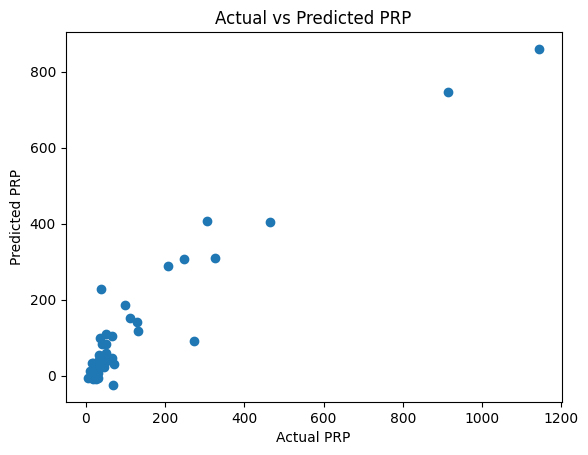

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('machine.data.csv')
# 결측값 확인
missing_values = data.isnull().sum()
print(missing_values)


# 범주형 변수를 숫자형으로 변환
label_encoder = LabelEncoder()
data['VendorName'] = label_encoder.fit_transform(data['VendorName'])
data['ModelName'] = label_encoder.fit_transform(data['ModelName'])


# 특성과 타겟 분리
features = data.drop('PRP', axis=1)
target = data['PRP']

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-validation scores:', cv_scores)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# 시각화
plt.scatter(y_test, y_pred)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.show()


# 2

Cross-validation scores: [0.64090164 0.45997191 0.47116771 0.85448756 0.84857907]
Mean cross-validation score: 0.6550215792159377
Training set evaluation:
Mean Squared Error: 3061.4334002375476
Mean Absolute Error: 34.96481371039906
R^2 Score: 0.840753142969376
Testing set evaluation:
Mean Squared Error: 5754.59813733849
Mean Absolute Error: 48.22531549342178
R^2 Score: 0.8869582820686039


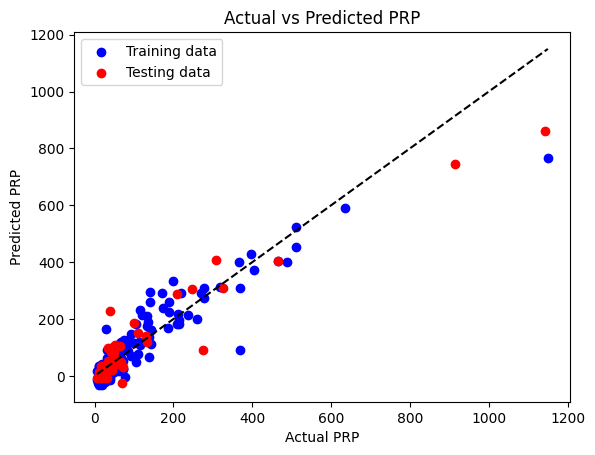

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('machine.data.csv')

# 범주형 변수 인코딩
label_encoder = LabelEncoder()
data['VendorName'] = label_encoder.fit_transform(data['VendorName'])
data['ModelName'] = label_encoder.fit_transform(data['ModelName'])

# 특성과 타겟 정의
X = data.drop('PRP', axis=1)
y = data['PRP']

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 모델 초기화
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())


# 훈련 세트에 대한 예측
y_train_pred = model.predict(X_train)

# 메트릭 계산
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Training set evaluation:')
print('Mean Squared Error:', mse_train)
print('Mean Absolute Error:', mae_train)
print('R^2 Score:', r2_train)


# 테스트 세트에 대한 예측
y_test_pred = model.predict(X_test)

# 메트릭 계산
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Testing set evaluation:')
print('Mean Squared Error:', mse_test)
print('Mean Absolute Error:', mae_test)
print('R^2 Score:', r2_test)



plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.legend()
plt.show()


# 3

Cross-validation scores: [0.82551352 0.68173961 0.46773161 0.89515181 0.89715035]
Mean cross-validation score: 0.7534573790787219
Training set evaluation:
Mean Squared Error: 659.0582374032708
Mean Absolute Error: 17.37343391430858
R^2 Score: 0.9657177082805493
Testing set evaluation:
Mean Squared Error: 4572.015209244218
Mean Absolute Error: 30.717204567757253
R^2 Score: 0.9101886106854246


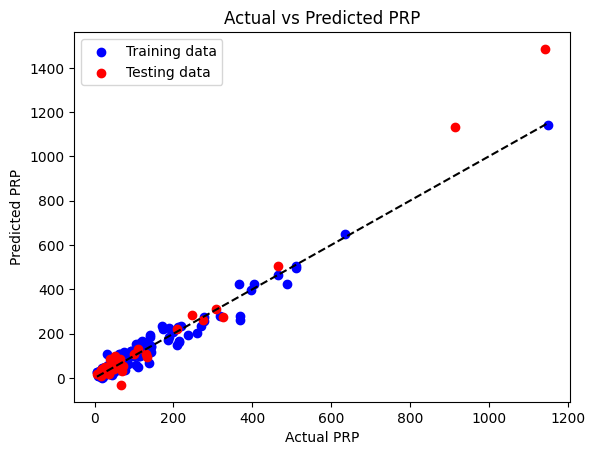

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('machine.data.csv')

# 범주형 변수 인코딩
label_encoder = LabelEncoder()
data['VendorName'] = label_encoder.fit_transform(data['VendorName'])
data['ModelName'] = label_encoder.fit_transform(data['ModelName'])

# 특성과 타겟 정의
X = data.drop('PRP', axis=1)
y = data['PRP']

# 다항 특성 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge 회귀 모델 초기화 및 훈련
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 교차 검증
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())

# 훈련 데이터에 대한 평가
y_train_pred = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Training set evaluation:')
print('Mean Squared Error:', mse_train)
print('Mean Absolute Error:', mae_train)
print('R^2 Score:', r2_train)

# 테스트 데이터에 대한 평가
y_test_pred = ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Testing set evaluation:')
print('Mean Squared Error:', mse_test)
print('Mean Absolute Error:', mae_test)
print('R^2 Score:', r2_test)

# 결과 시각화


plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.legend()
plt.show()
